Профіль колонок набору даних:

datetime: дата та час зібрані погодинно
season: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
holiday: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
workingday: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
weather:
Ясно, Мало хмарно, частково хмарно
Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
temp: температура в градусах Цельсія
atemp: як відчувається температура в градусах Цельсія
humidity: вологість
windspeed: швидкість вітру
casual: кількість неформальних користувачів
registered: кількість зареєстрованих користувачів
count: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

1.Чи існує різниця в поведінці користувачів (зареєстрованих і неформальних) у різні сезони?
2.Які часи доби (наприклад, ранкові чи вечірні години) є найбільш активними для оренди велосипедів?
3.Які дні тижня мають найбільший попит на оренду велосипедів, і як це змінюється в залежності від сезону?

In [462]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv('../data/yulu_rental.csv')
df[234:270]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
234,2011-01-11 01:00:00,1,0,1,1,5.74,7.575,59,11.0014,0,3,3
235,2011-01-11 02:00:00,1,0,1,2,6.56,7.575,55,12.9980,0,3,3
236,2011-01-11 05:00:00,1,0,1,2,6.56,9.090,55,8.9981,0,6,6
237,2011-01-11 06:00:00,1,0,1,2,6.56,9.090,55,8.9981,0,27,27
238,2011-01-11 07:00:00,1,0,1,2,6.56,11.365,55,0.0000,2,97,99
239,2011-01-11 08:00:00,1,0,1,2,7.38,10.605,51,6.0032,3,214,217
240,2011-01-11 09:00:00,1,0,1,2,7.38,9.850,51,11.0014,3,127,130
241,2011-01-11 10:00:00,1,0,1,2,8.20,10.605,51,11.0014,3,51,54
242,2011-01-11 11:00:00,1,0,1,2,8.20,10.605,47,8.9981,4,31,35
243,2011-01-11 12:00:00,1,0,1,2,8.20,11.365,51,7.0015,2,55,57


In [464]:
#помітила некорректні дані в стовпці season,дата січень але в стовпці season дані відносяться до 1(це весна)
df["datetime"] = pd.to_datetime(df["datetime"]) 
def season(x):
    if 0<x<3 or x>11:
        return '1'#зима
    if 2<x<6:
        return '2'#весна
    if 5<x<9:
        return '3'#літо
    if 8<x<12:
        return '4'#осінь
df['season_new'] = df["datetime"].dt.month.apply(season)

1.Чи існує різниця в поведінці користувачів (зареєстрованих і неформальних) у різні сезони?

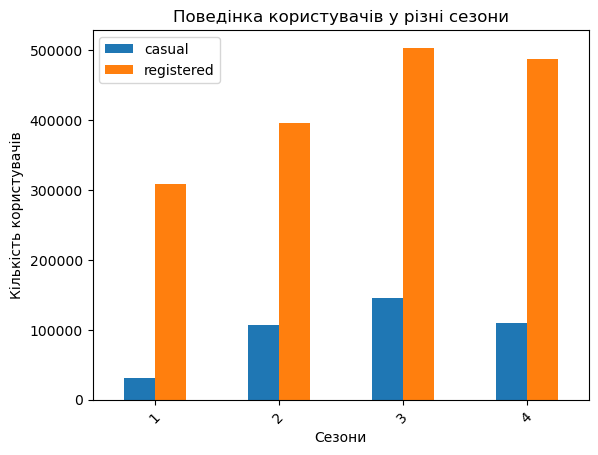

In [467]:
data1.plot.bar()
plt.xticks(rotation = 45)
plt.title('Поведінка користувачів у різні сезони')
plt.xlabel('Cезони')
plt.ylabel('Кількість користувачів')
plt.show();

Активність неформальних користувачів досягає найбільшого піку в літній та осінній періоди. Це відповідає очікуванням, оскільки ці сезони зазвичай характеризуються більш помірними температурами та комфортними умовами для користування велосипедами. У порівнянні з зимою, весняний період також показує вищу активність, що може бути пов’язано з покращенням погодних умов і настанням тепла, але він все ж поступається літньому і осінньому сезонам.

Зареєстровані користувачі демонструють подібну тенденцію, з максимальним попитом в літні та осінні місяці. Це також може бути обумовлено тим, що такі користувачі більш схильні використовувати велосипеди протягом всього року, однак їх активність зростає саме в ці сезони, коли умови для оренди є оптимальними.

З іншого боку, зимові місяці часто супроводжуються низькими температурами, снігом та дощем, що може суттєво знизити попит на оренду велосипедів. 

2.Які часи доби (наприклад, ранкові чи вечірні години) є найбільш активними для оренди велосипедів?

In [471]:
df["hour"] = df["datetime"].dt.hour

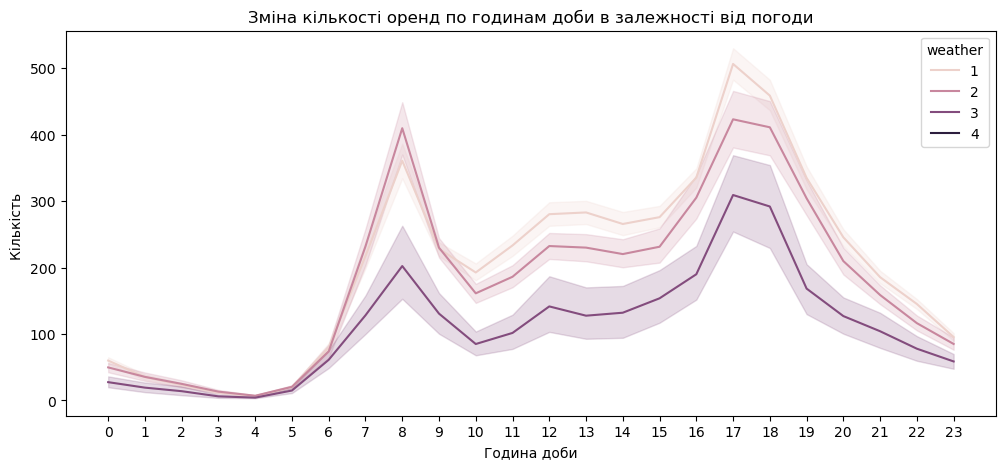

In [473]:
plt.figure(figsize =( 12, 5))
sns.lineplot(x = 'hour', y = 'count', hue = 'weather', data = df)
plt.title('Зміна кількості оренд по годинам доби в залежності від погоди')
plt.xticks(ticks = range(24))
plt.xlabel('Година доби')
plt.ylabel('Кількість ')
plt.show()

Графік відображає рівень активності користувачів протягом доби, погодинно, залежно від сезону. Спостерігаємо два чіткі пікові моменти в 8:00 ранку та 17:00-18:00 вечора в усіх сезонах. Це час, коли люди, ймовірно, використовують велосипеди для поїздки на роботу та назад, що створює високий попит на оренду. 
Крім того, помітна середня активність між 12:00 та 15:00, з найвищими показниками в літній сезон (коли погодні умови найсприятливіші для велосипедних прогулянок). В цей час люди часто беруть велосипеди для обіду або коротких поїздок, що відображає підвищену популярність оренди велосипедів у спокійніші години дня.

3.Які дні тижня мають найбільший попит на оренду велосипедів, і як це змінюється в залежності від сезону?

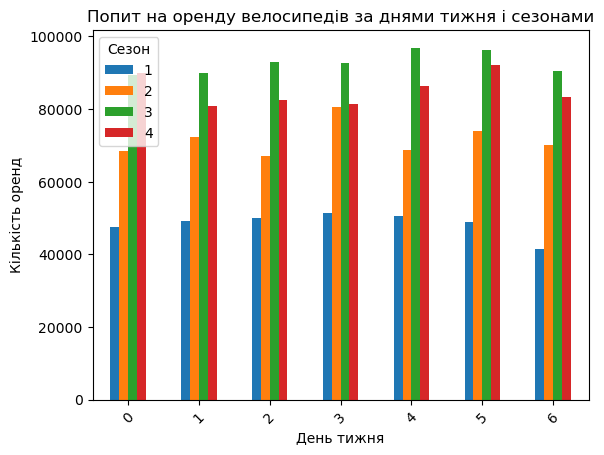

In [476]:
df["date"] = df["datetime"].dt.weekday
data2 = df.groupby(['date', 'season_new'])['count'].sum().unstack()
data2.plot.bar()
plt.title('Попит на оренду велосипедів за днями тижня і сезонами')
plt.xlabel('День тижня')
plt.ylabel('Кількість оренд')
plt.legend(title='Сезон')
plt.xticks(rotation=45)
plt.show();


Графік відображає попит на оренду велосипедів за днями тижня(де 0 це понеділок та 6-неділя) та сезонами(1-це зима та 4 - осінь). Спостерігається, що активність користувачів на протязі тижня залишається досить стабільною, з незначними коливаннями між будніми та вихідними днями. Це свідчить про те, що оренда велосипедів є популярною не лише в робочі дні, але й у вихідні, коли люди можуть використовувати велосипеди для відпочинку чи дозвілля. Незважаючи на деякі зміни в попиті в окремі дні, загальний тренд залишається рівномірним, що вказує на сталий інтерес до оренди велосипедів протягом усього тижня. Таким чином, бізнес може орієнтуватися на постійну доступність велосипедів на всіх етапах тижня, а не лише в певні дні.